In [20]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


from sklearn import preprocessing
from sklearn import svm
from sklearn import tree
import pandas as pd
import pickle
import numpy as np
import seaborn as sns

In [21]:
import pandas as pd

df = pd.read_csv('android_traffic.csv')
df.head()

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign


In [22]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()


,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times
count,7845.00,7845.00,7845.00,7845.00,7845.00,7845.00,7845.00,7845.00,7845.00,7845.00,0.00,0.00,0.00,7845.00,7845.00
mean,147.58,7.74,2.75,16543.75,0.06,0.00,152.91,194.71,202496.72,16922.60,NaN,NaN,NaN,152.91,4.90
std,777.92,51.65,2.92,82256.50,1.39,0.02,779.03,1068.11,1401075.62,82381.82,NaN,NaN,NaN,779.03,18.90
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,69.00,NaN,NaN,NaN,1.00,0.00
25%,6.00,0.00,1.00,888.00,0.00,0.00,7.00,7.00,934.00,1046.00,NaN,NaN,NaN,7.00,1.00
50%,25.00,0.00,2.00,3509.00,0.00,0.00,30.00,24.00,4090.00,3803.00,NaN,NaN,NaN,30.00,3.00
75%,93.00,0.00,4.00,12189.00,0.00,0.00,98.00,92.00,26244.00,12610.00,NaN,NaN,NaN,98.00,5.00
max,37143.00,2167.00,43.00,4226790.00,65.00,1.00,37150.00,45928.00,68235164.00,4227323.00,NaN,NaN,NaN,37150.00,913.00


Deskriptive Statistik:
        tcp_packets  dist_port_tcp  external_ips  vulume_bytes  udp_packets  \
count      7845.00        7845.00       7845.00       7845.00      7845.00   
mean        147.58           7.74          2.75      16543.75         0.06   
std         777.92          51.65          2.92      82256.50         1.39   
min           0.00           0.00          0.00          0.00         0.00   
25%           6.00           0.00          1.00        888.00         0.00   
50%          25.00           0.00          2.00       3509.00         0.00   
75%          93.00           0.00          4.00      12189.00         0.00   
max       37143.00        2167.00         43.00    4226790.00        65.00   

       tcp_urg_packet  source_app_packets  remote_app_packets  \
count         7845.00             7845.00             7845.00   
mean             0.00              152.91              194.71   
std              0.02              779.03             1068.11   
min          

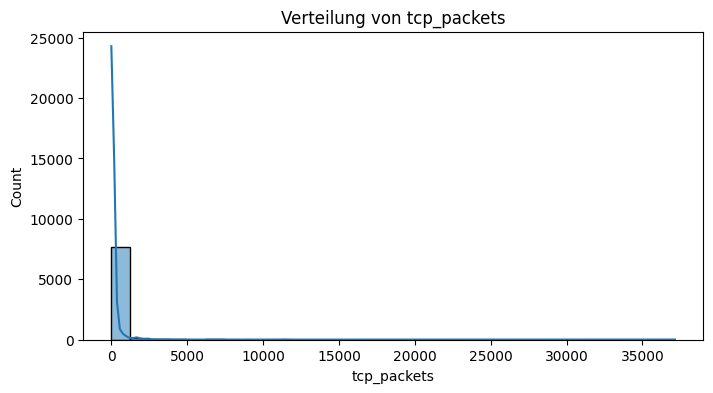

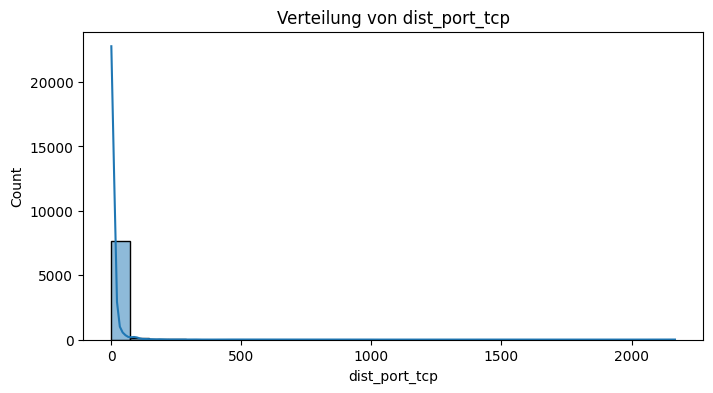

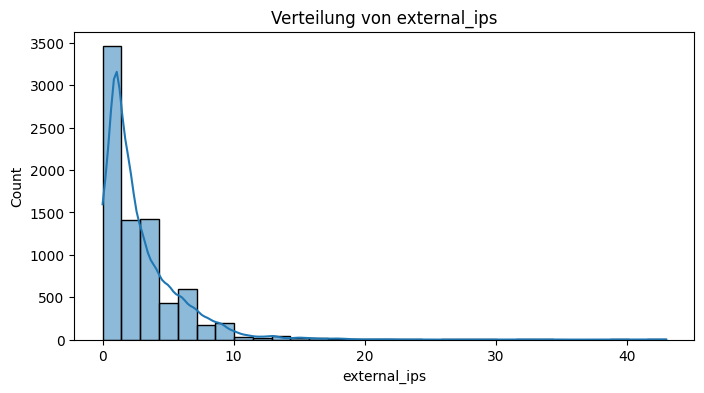

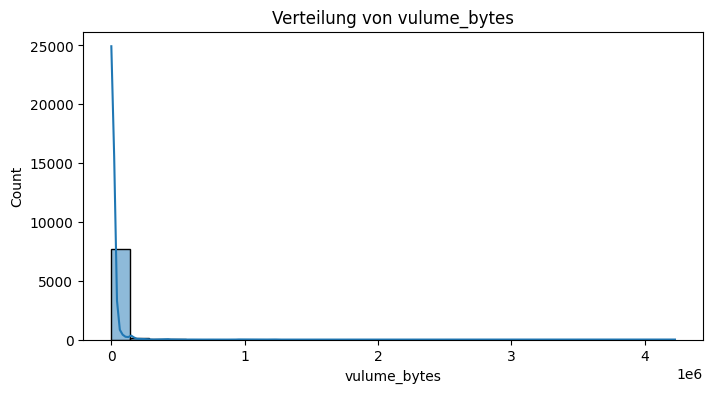

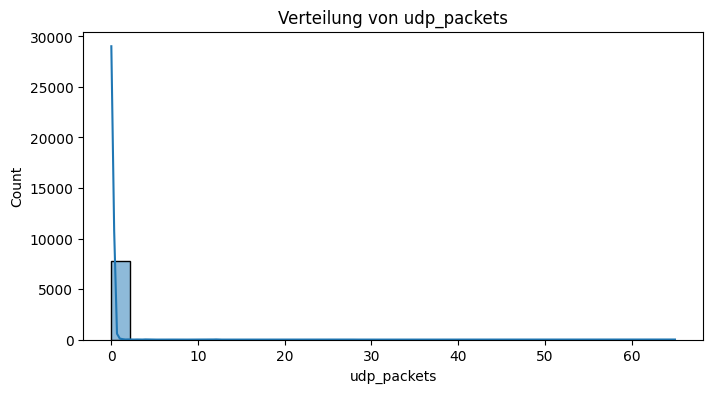

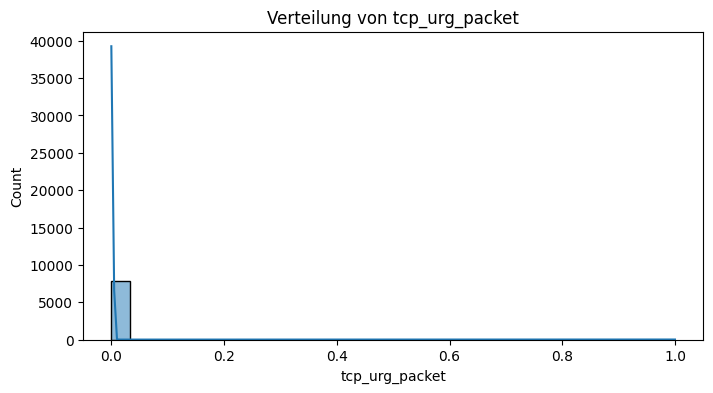

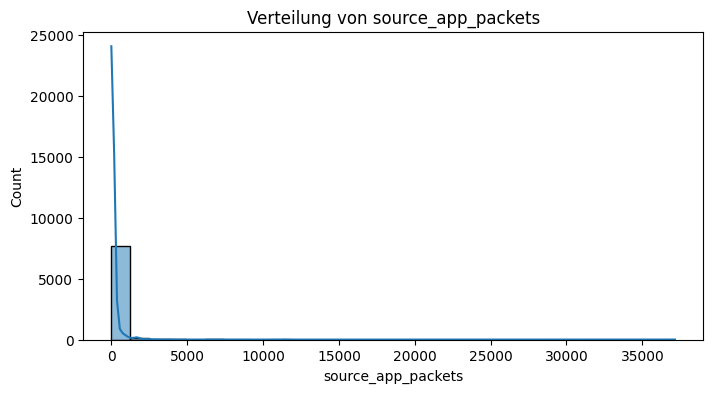

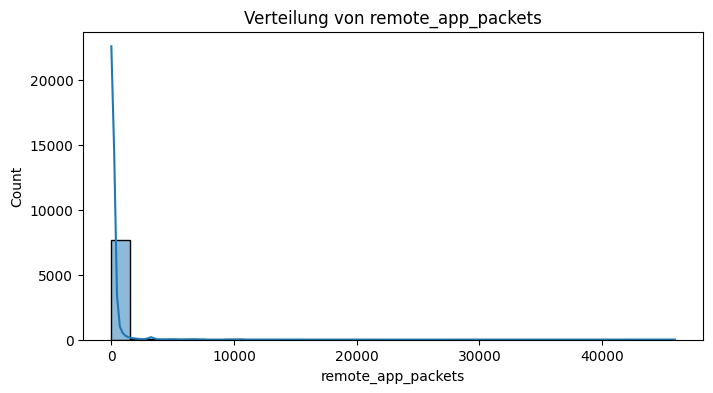

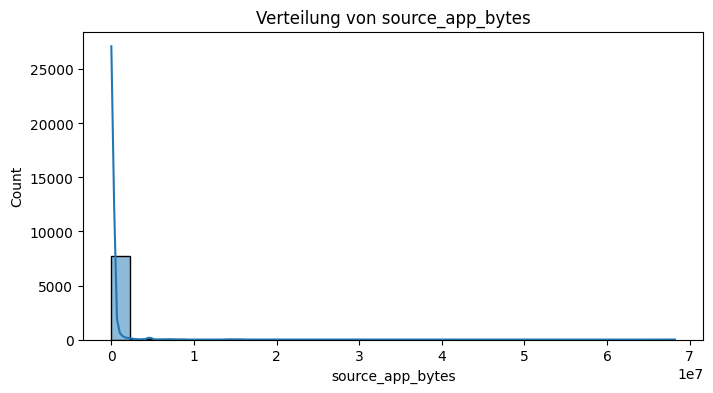

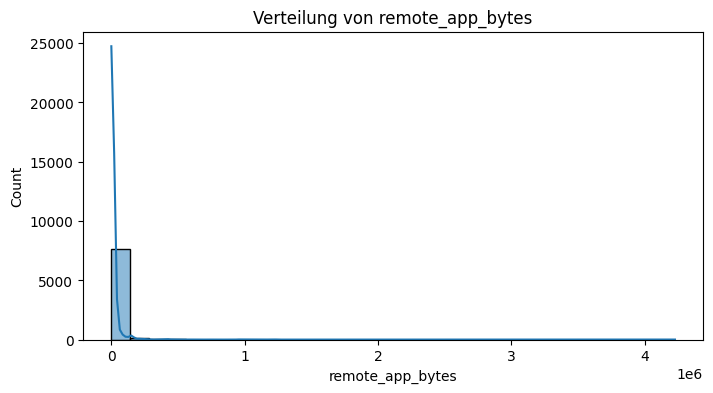

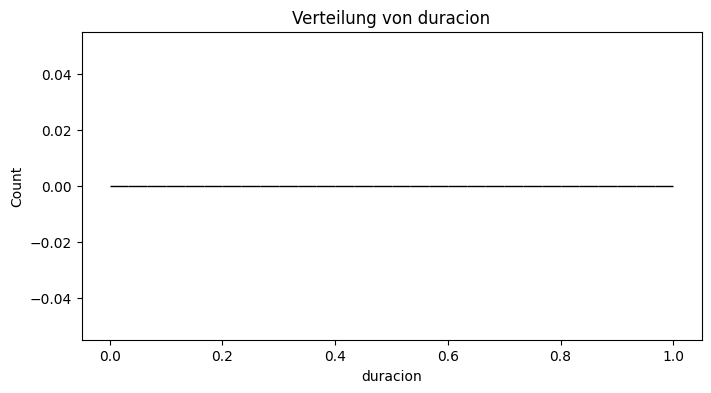

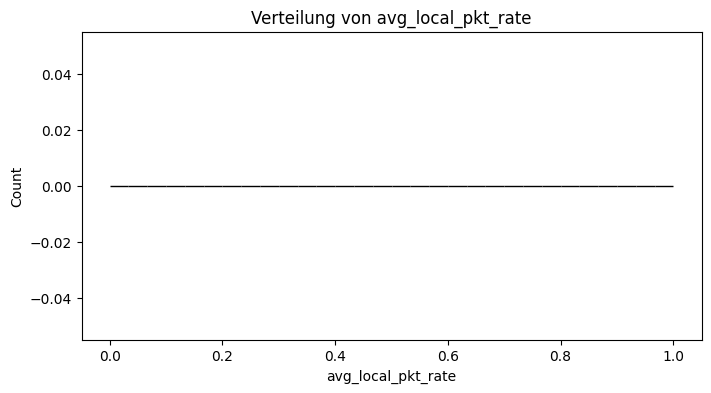

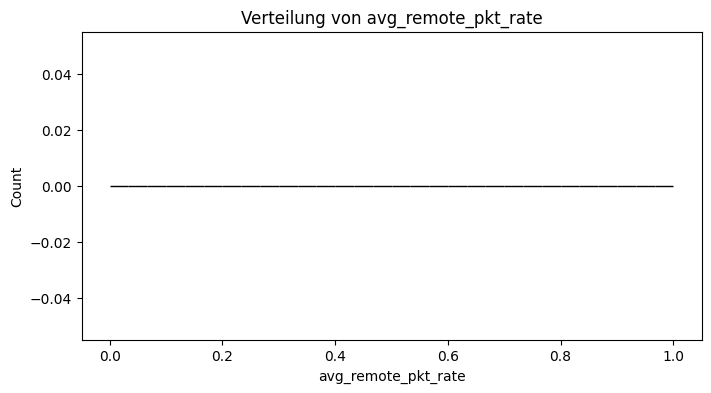

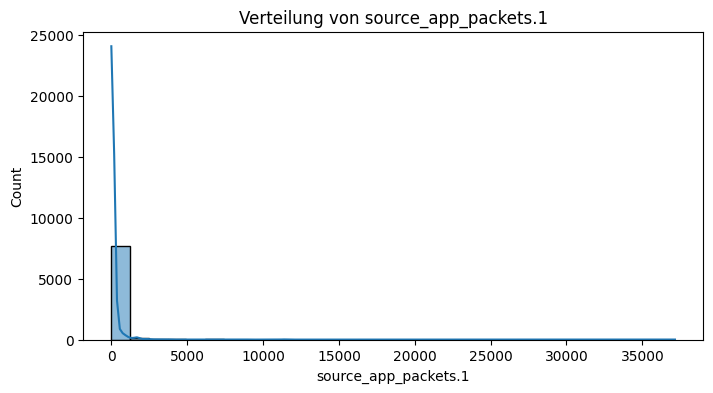

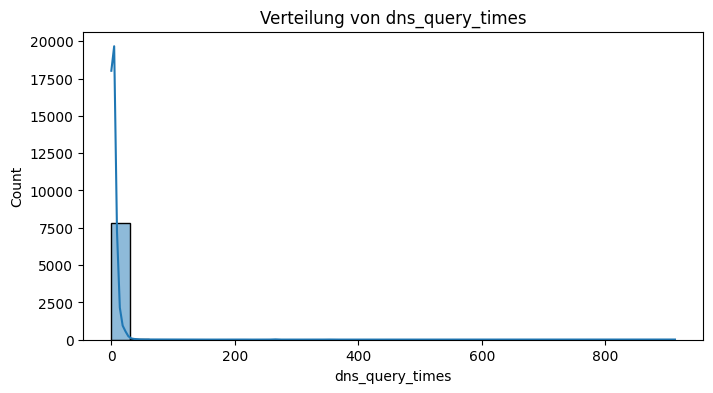

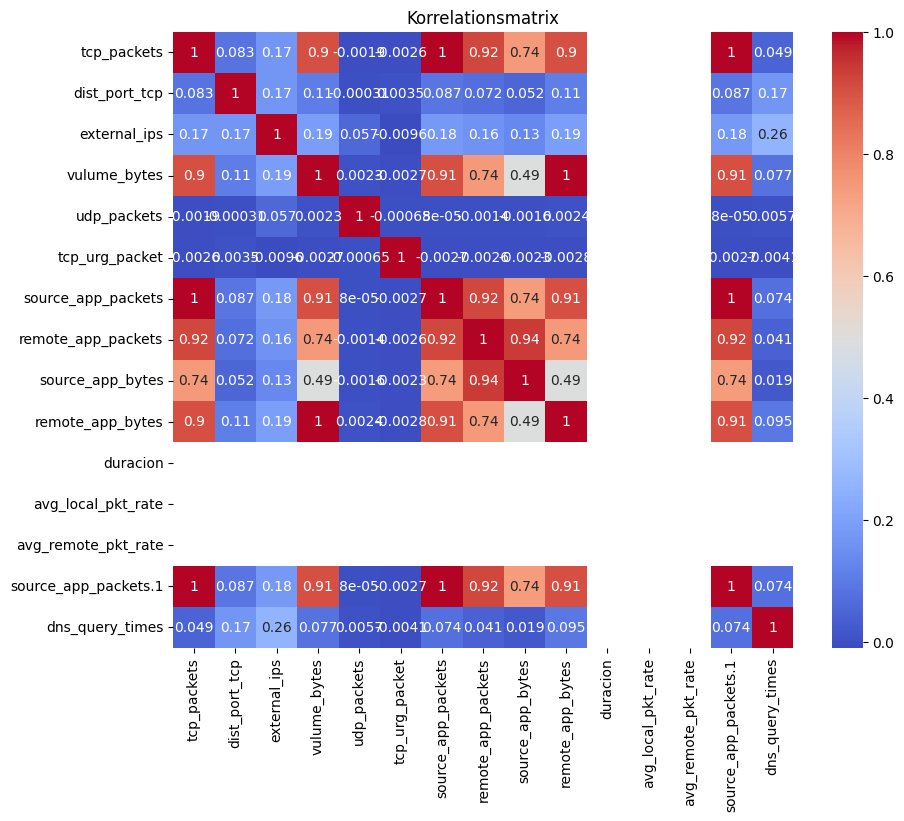

Fehlende Werte pro Spalte:
 name                       0
tcp_packets                0
dist_port_tcp              0
external_ips               0
vulume_bytes               0
udp_packets                0
tcp_urg_packet             0
source_app_packets         0
remote_app_packets         0
source_app_bytes           0
remote_app_bytes           0
duracion                7845
avg_local_pkt_rate      7845
avg_remote_pkt_rate     7845
source_app_packets.1       0
dns_query_times            0
type                       0
dtype: int64


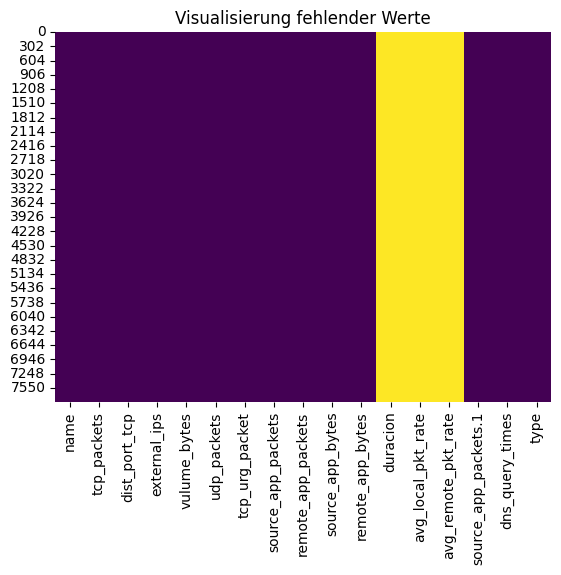

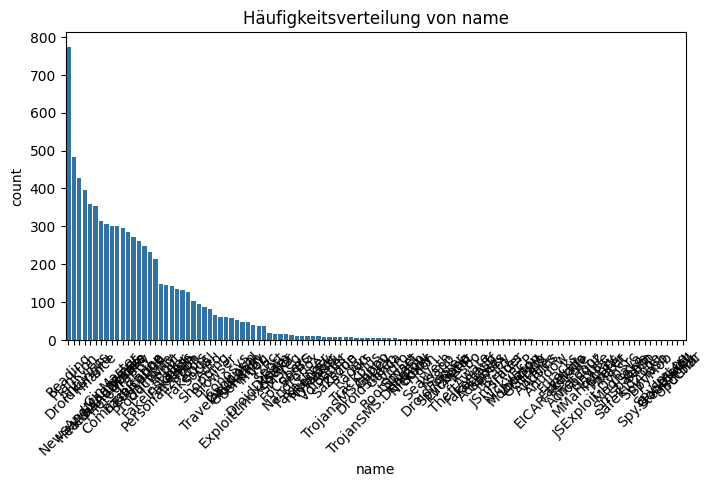

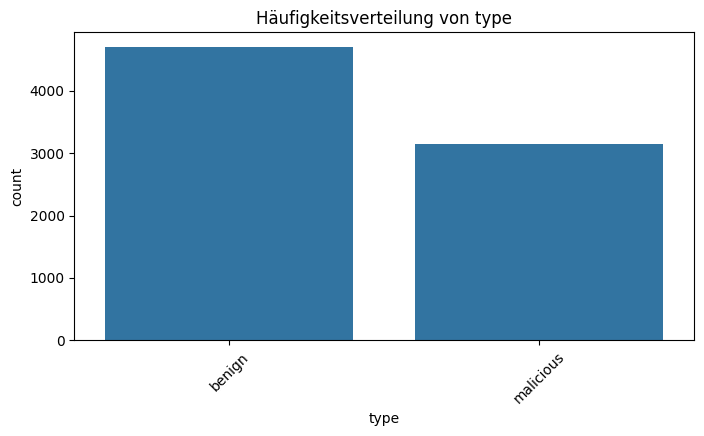

Gruppierte Statistiken für name:
            tcp_packets  dist_port_tcp  external_ips  vulume_bytes  \
name                                                                
Ackposts          0.00           0.00          0.00          0.00   
Acnetdoor        10.00           0.00          1.00        933.00   
Adrd             18.44           3.30          0.89       2355.65   
Adsms             0.00           0.00          0.00          0.00   
Aks               0.00           0.00          0.00          0.00   
...                ...            ...           ...           ...   
YcChar            0.00           0.00          0.00          0.00   
Yzhc              0.92           0.92          0.89       1565.56   
Zitmo             0.00           0.00          0.00          0.00   
Zsone             0.50           0.50          0.12         37.00   
chess            79.76          15.29          2.48      11007.59   

           udp_packets  tcp_urg_packet  source_app_packets  \
name  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Deskriptive Statistik
print("Deskriptive Statistik:\n", df.describe())

# 2. Verteilung der Variablen
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Verteilung von {column}')
    plt.show()

# 3. Korrelationen
correlation_matrix = df.drop(['name', 'type'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Korrelationsmatrix')
plt.show()

# 4. Fehlende Werte
missing_values = df.isnull().sum()
print("Fehlende Werte pro Spalte:\n", missing_values)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisierung fehlender Werte')
plt.show()

# 5. Kategorische Variablen
categorical_columns = df.select_dtypes(include=["object", "category"]).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 20))
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Häufigkeitsverteilung von {column}')
    plt.xticks(rotation=45)
    plt.show()

# 6. Gruppierte Analysen
if not categorical_columns.empty:
    group_column = categorical_columns[0]
    grouped_stats = df.groupby(group_column)[numerical_columns].mean()
    print(f"Gruppierte Statistiken für {group_column}:\n", grouped_stats)

# 7. Zeitbasierte Analysen (falls Zeitdaten vorhanden)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.resample('M').mean().plot(figsize=(10, 6))
    plt.title('Zeitbasierte Trends')
    plt.show()

# 8. Feature-Engineering-Vorbereitung
interaction_terms = {}
for i, col1 in enumerate(numerical_columns):
    for col2 in numerical_columns[i+1:]:
        interaction_terms[f'{col1}_x_{col2}'] = df[col1] * df[col2]

# Umwandlung des Dictionaries in ein DataFrame in einem Schritt
interaction_terms_df = pd.DataFrame(interaction_terms)

# Erstellen der Interaktionstermen
print("Erstellte Interaktionstermen:\n", interaction_terms_df.head())

# 9. Anomalieerkennung
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = iso.fit_predict(df[numerical_columns])
anomalies = df[df['anomaly'] == -1]
print(f"Anzahl Anomalien: {len(anomalies)}")

# 10. Klassenverteilung (bei Klassifikationsproblemen)
if 'target' in df.columns:
    target_counts = df['target'].value_counts()
    print("Klassenverteilung:\n", target_counts)
    target_counts.plot(kind='bar', figsize=(8, 4))
    plt.title('Klassenverteilung')
    plt.show()


In [6]:
print("Spalten:", df.columns)
print("")
print("Shape:", df.shape)

Spalten: Index(['name', 'tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'tcp_urg_packet', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate',
       'source_app_packets.1', 'dns_query_times', 'type', 'anomaly'],
      dtype='object')

Shape: (7845, 18)


In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

print(df['type'].value_counts())
# Calculate the percentage of each type
type_counts = df['type'].value_counts()
type_percent = (type_counts / len(df)) * 100

print("\nPercentage distribution of types:")
print(type_percent)

type
benign       4704
malicious    3141
Name: count, dtype: int64

Percentage distribution of types:
type
benign      59.96
malicious   40.04
Name: count, dtype: float64


In [8]:
# Check if source_app_packets.1 and source_app_packets have the same rows and values
identical = df['source_app_packets.1'].equals(df['source_app_packets'])

if identical:
    print("source_app_packets.1 and source_app_packets are 1:1 identical.")
else:
    print("source_app_packets.1 and source_app_packets are not 1:1 identical.")


source_app_packets.1 and source_app_packets are 1:1 identical.


In [9]:
df = df.drop(['duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate', 'source_app_packets.1'], axis=1).copy()
df.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,anomaly
count,7845.00,7845.00,7845.00,7845.00,7845.00,7845.00,7845.00,7845.00,7845.00,7845.00,7845.00,7845.00
mean,147.58,7.74,2.75,16543.75,0.06,0.00,152.91,194.71,202496.72,16922.60,4.90,0.98
std,777.92,51.65,2.92,82256.50,1.39,0.02,779.03,1068.11,1401075.62,82381.82,18.90,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,69.00,0.00,-1.00
25%,6.00,0.00,1.00,888.00,0.00,0.00,7.00,7.00,934.00,1046.00,1.00,1.00
50%,25.00,0.00,2.00,3509.00,0.00,0.00,30.00,24.00,4090.00,3803.00,3.00,1.00
75%,93.00,0.00,4.00,12189.00,0.00,0.00,98.00,92.00,26244.00,12610.00,5.00,1.00
max,37143.00,2167.00,43.00,4226790.00,65.00,1.00,37150.00,45928.00,68235164.00,4227323.00,913.00,1.00


In [10]:
df.shape

(7845, 14)

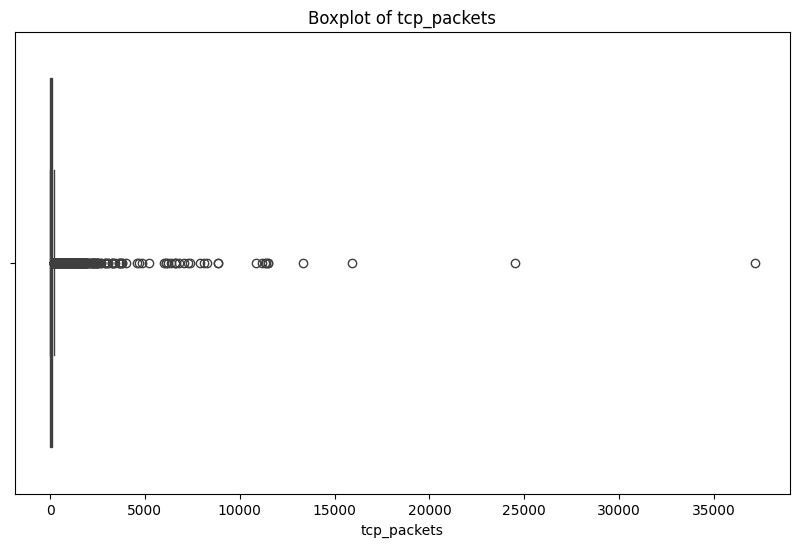

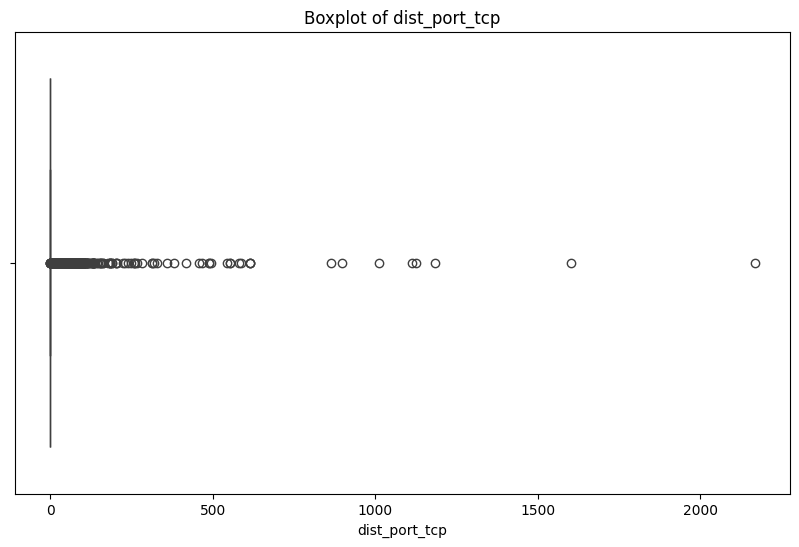

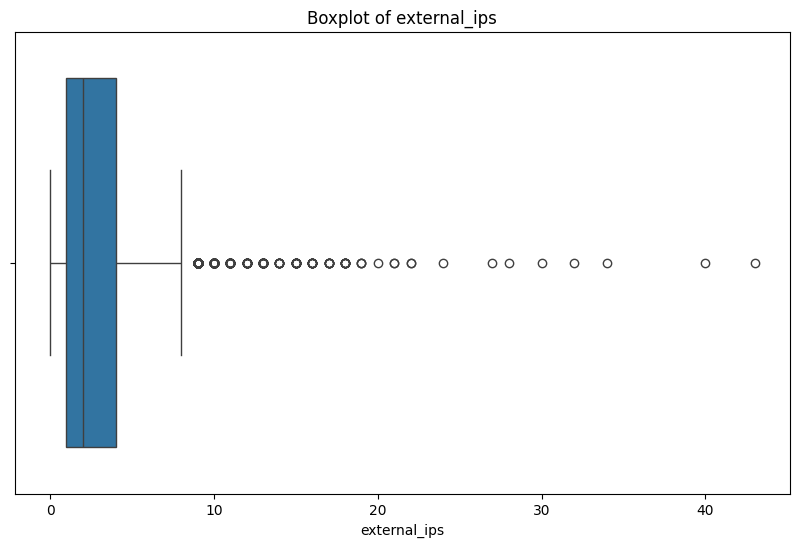

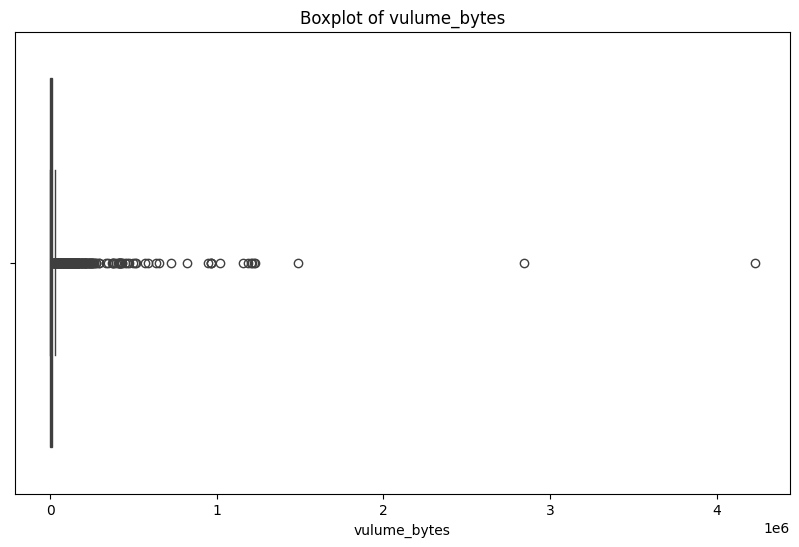

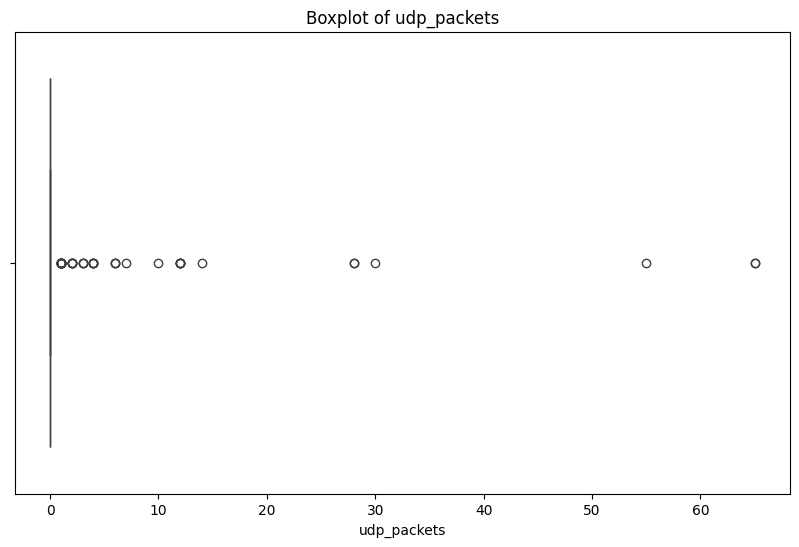

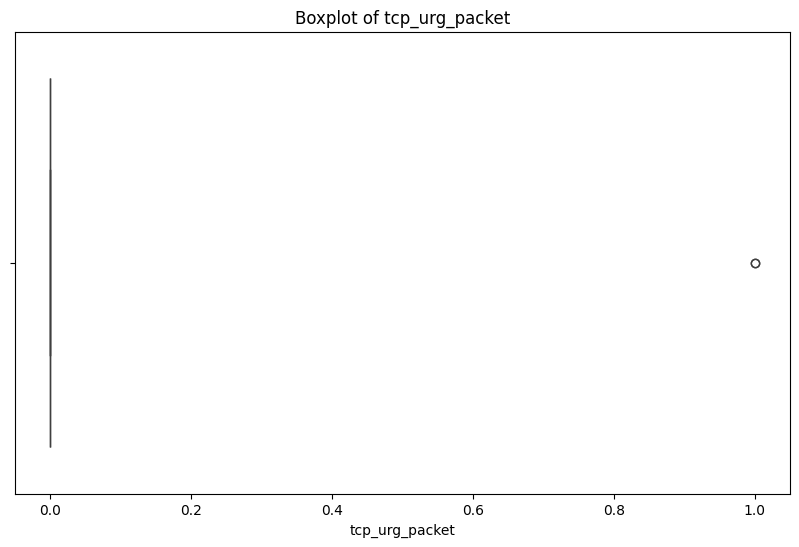

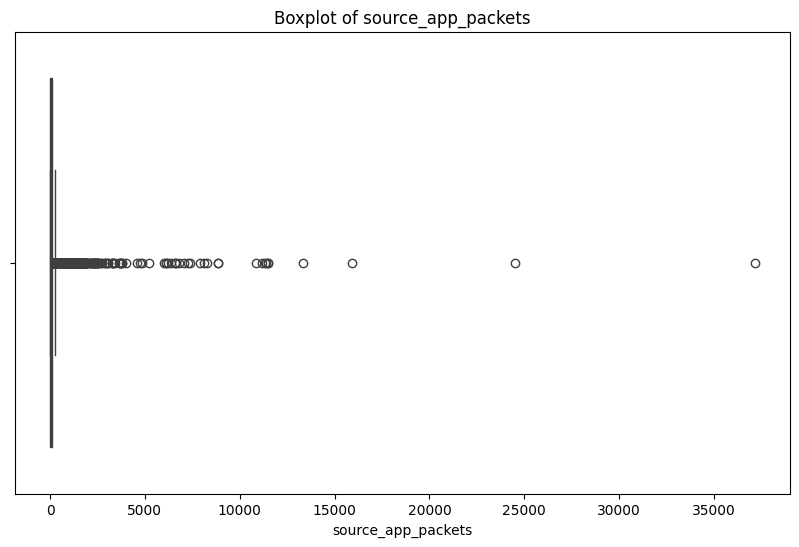

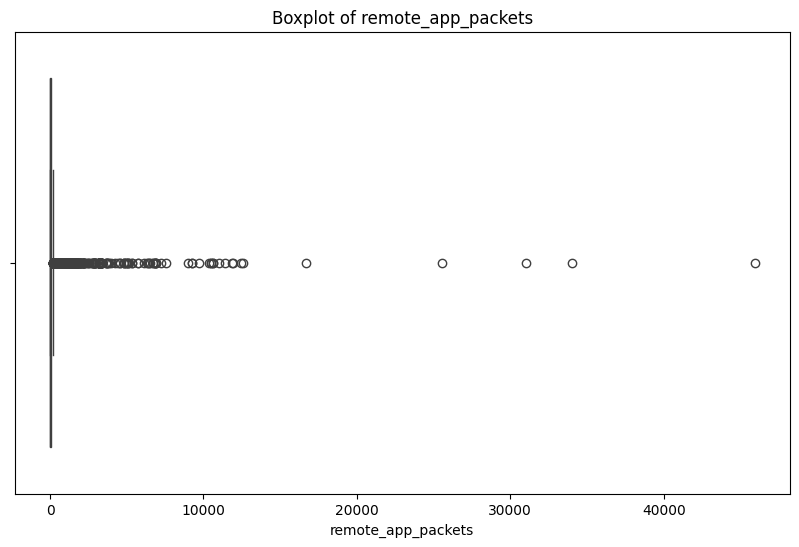

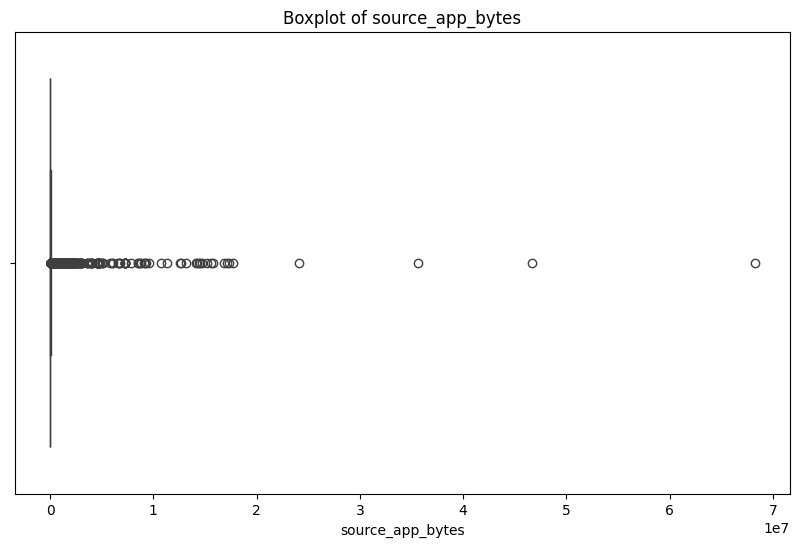

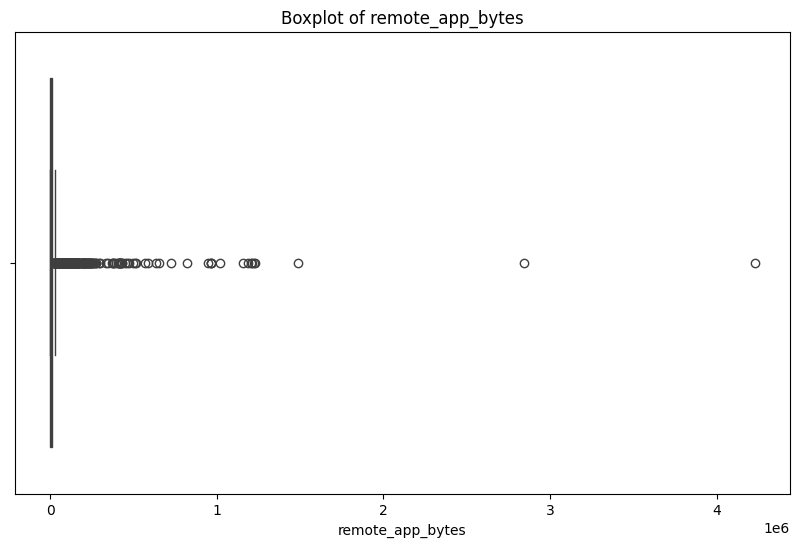

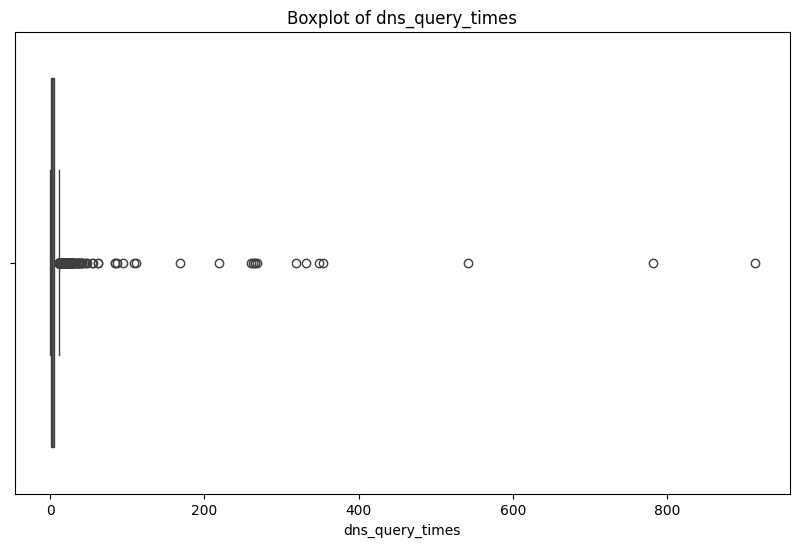

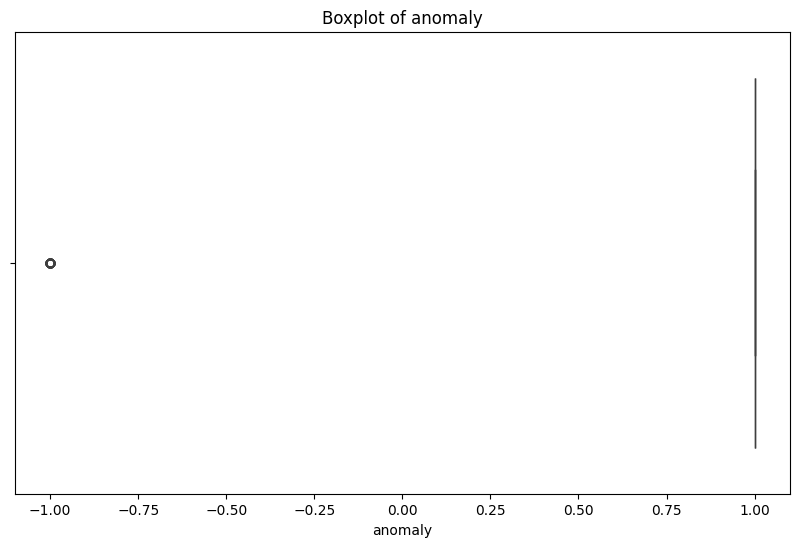

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each numerical column and create a boxplot
for column in df.select_dtypes(include=['int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [12]:
df = df[df.tcp_packets<20000].copy()
df = df[df.dist_port_tcp<1500].copy()
df = df[df.external_ips<35].copy()
df = df[df.vulume_bytes<2000000].copy()
df = df[df.udp_packets<20].copy()
df = df[df.tcp_urg_packet<0.5].copy()
df = df[df.source_app_packets<20000].copy()
df = df[df.remote_app_packets<40000].copy()
df = df[df.source_app_bytes<5000000].copy()
df = df[df.remote_app_bytes<20000000].copy()
df = df[df.dns_query_times<600].copy()

pairplot.png already exists, skipping recalculation.


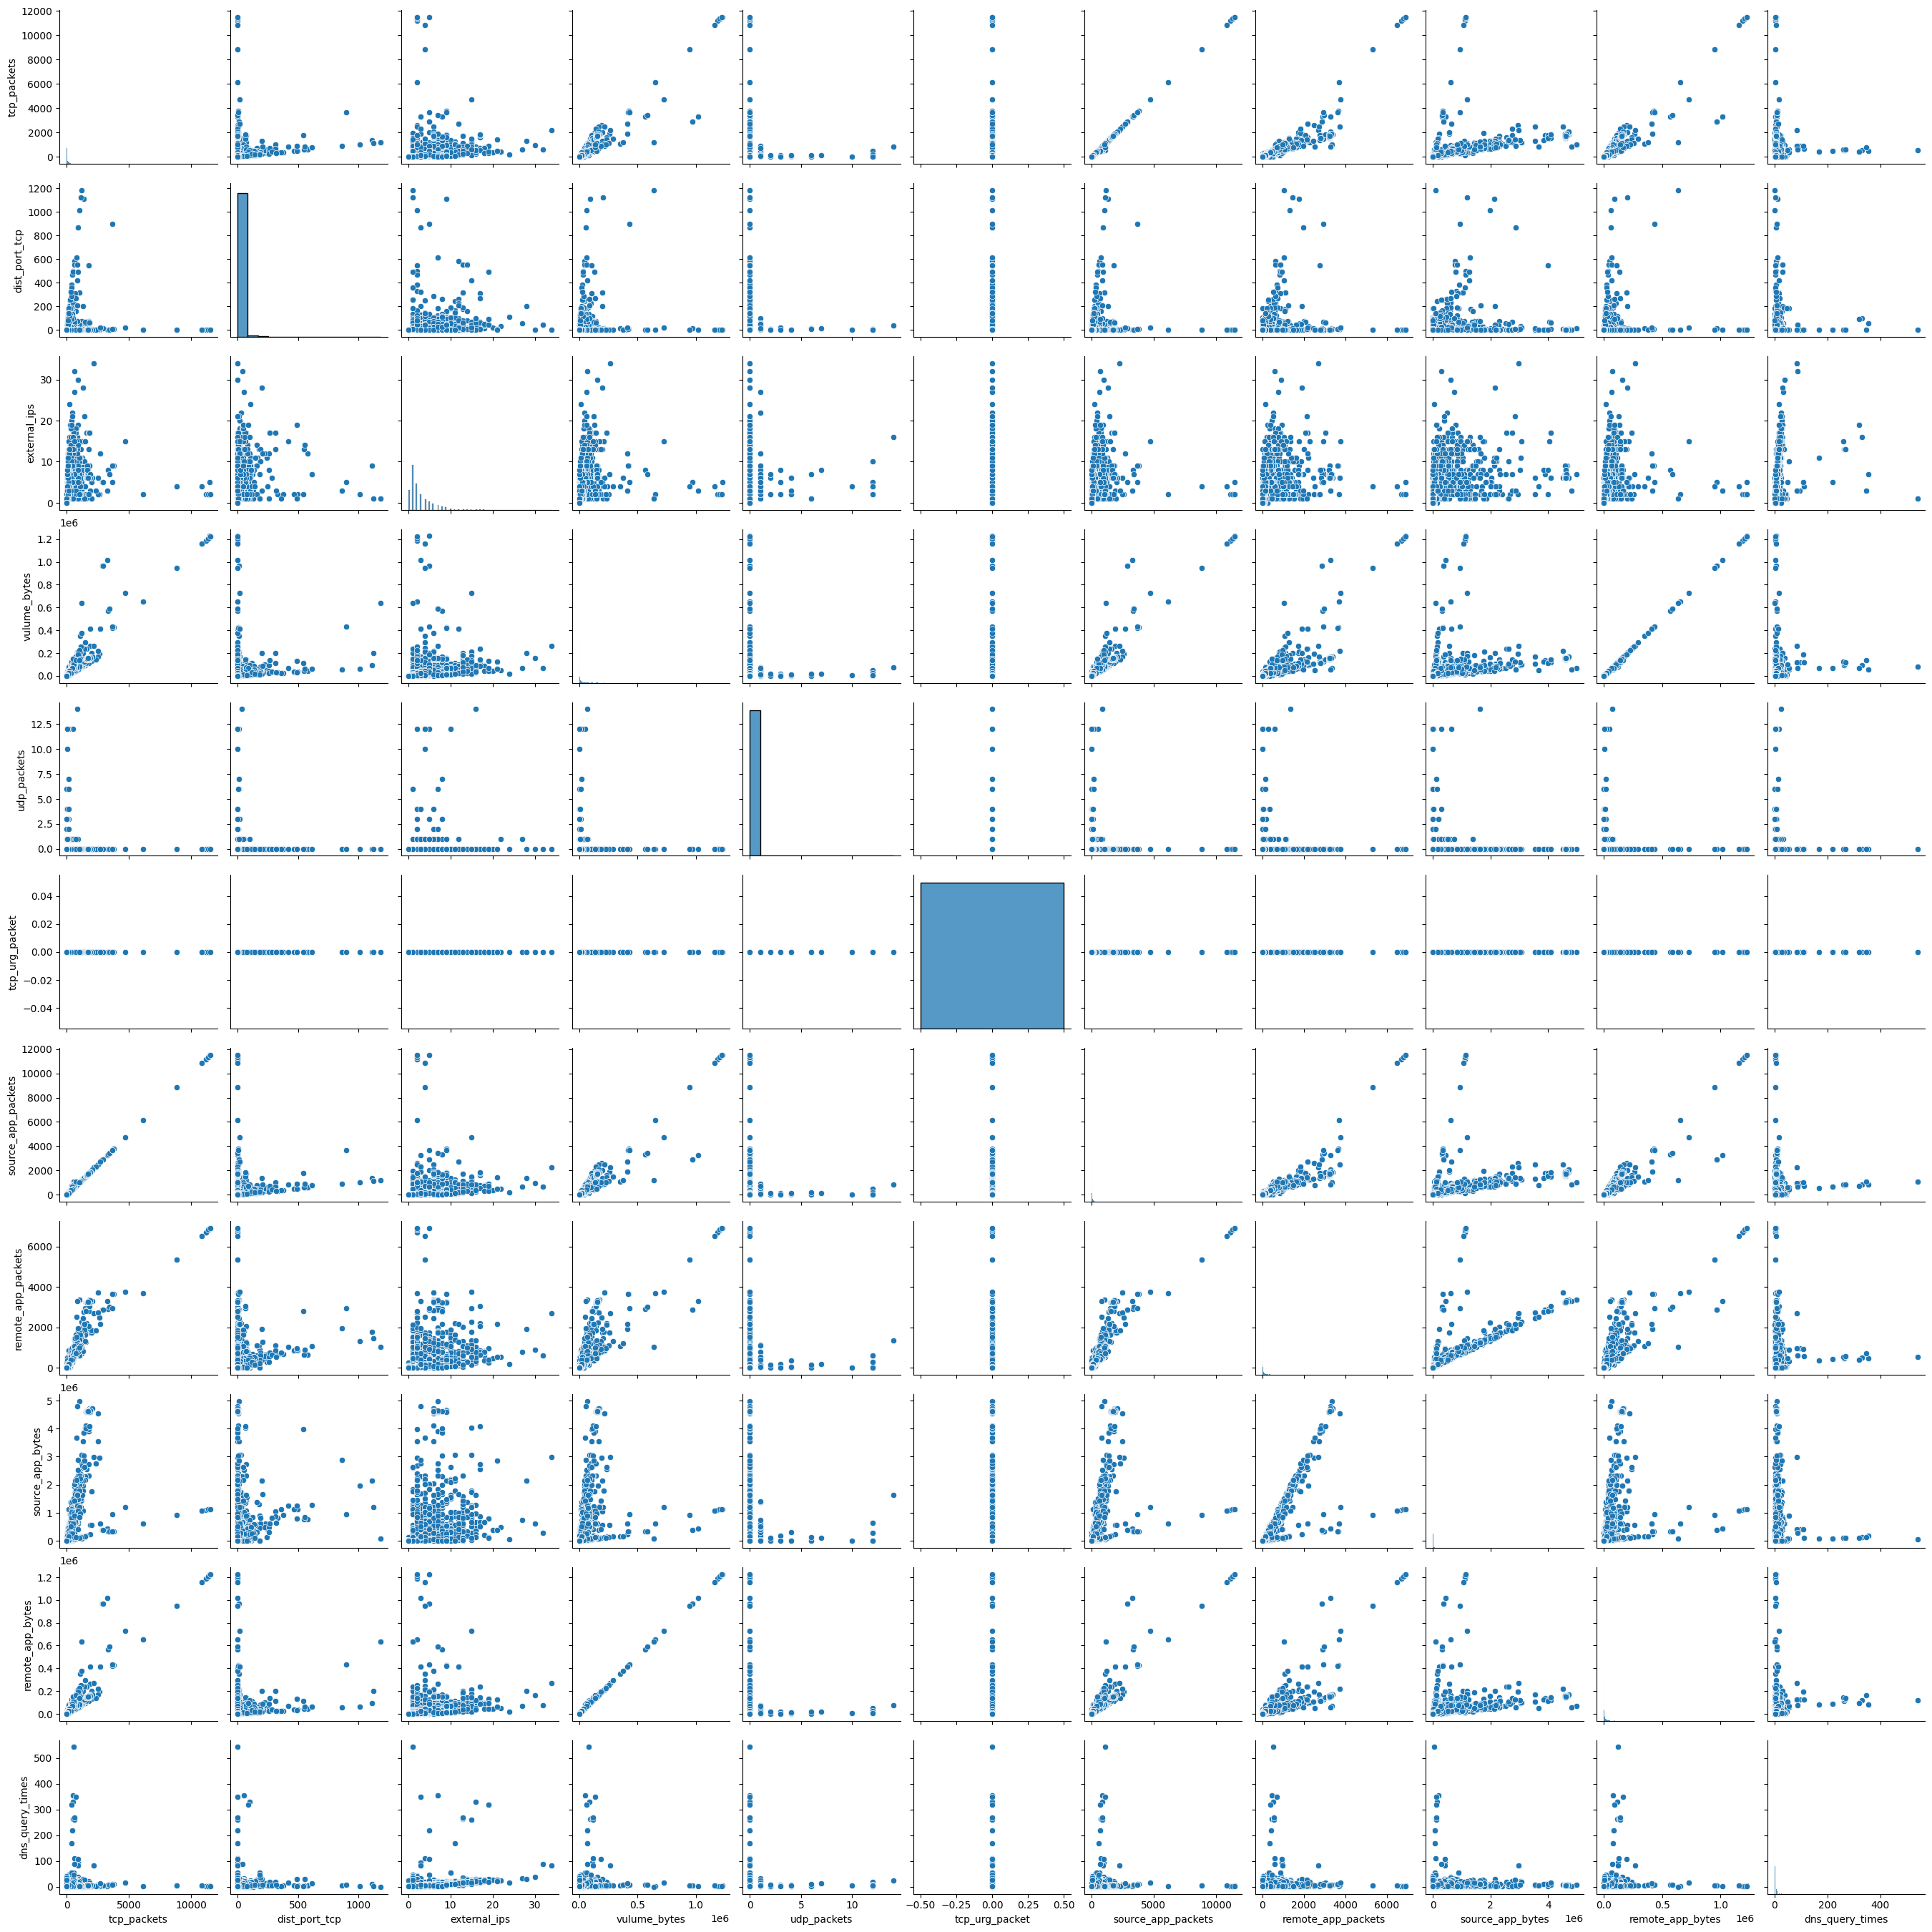

In [13]:
import os
from IPython.display import Image, display

# Check if the pairplot.png file exists
if not os.path.exists("pairplot.png"):
    # Cache the pairplot to avoid recalculating it every time
    pairplot = sns.pairplot(df)
    pairplot.savefig("pairplot.png")
else:
    print("pairplot.png already exists, skipping recalculation.")

# Display the image
display(Image(filename="pairplot.png"))

In [14]:
#NOTES
#AUSSREISSER: tcp_packets, dist_port_tcp, external_ips, vulume_bytes, udp_packets, remote_app_packets


In [15]:
scaler = preprocessing.RobustScaler()
scaledData = scaler.fit_transform(df.iloc[:,1:11])
scaledData = pd.DataFrame(scaledData, columns=['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets',' source_app_bytes','remote_app_bytes','dns_query_times'])

print(scaledData.head())

   tcp_packets  dist_port_tcp  external_ips  vulume_bytes  udp_packets  \
0         0.13           6.00          0.33          0.04         0.00   
1         1.10           0.00          2.33          1.84         0.00   
2         2.04           0.00          1.33          1.90         0.00   
3        -0.23           0.00         -0.33         -0.24         0.00   
4        -0.23           0.00         -0.33         -0.24         0.00   

   source_app_packets  remote_app_packets   source_app_bytes  \
0                0.00                0.10               0.11   
1                0.00                1.11               1.00   
2                0.00                1.99               2.29   
3                0.00               -0.26              -0.22   
4                0.00               -0.26              -0.22   

   remote_app_bytes  dns_query_times  
0              0.05             0.04  
1              0.95             1.84  
2              6.84             1.89  
3             

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaledData.iloc[:,0:10], df.type.astype("str"), test_size=0.2, random_state=45)

In [17]:
# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50, 75, 100, 150, 200, 250],
    'max_depth': [10, 20, 25, 50],
    'random_state': [15, 30, 45, 60]
}

# Define StratifiedKFold for consistent splitting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=45)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=cv,  # Use StratifiedKFold for cross-validation
    n_jobs=-1,
    scoring='accuracy'
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 20, 'n_estimators': 75, 'random_state': 15}
Best accuracy score:  0.8941701960329279


In [18]:
# Train the model with the best parameters
best_params = grid_search.best_params_
rdF = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=15
)

rdF.fit(X_train, y_train)
pred = rdF.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, pred)
print(rdF)
print("Test accuracy: ", accuracy)
print(classification_report(y_test, pred))
print("Cohen Kappa Score: ", cohen_kappa_score(y_test, pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))

RandomForestClassifier(max_depth=20, random_state=15)
Test accuracy:  0.9120102761721259
              precision    recall  f1-score   support

      benign       0.92      0.94      0.93       938
   malicious       0.90      0.87      0.89       619

    accuracy                           0.91      1557
   macro avg       0.91      0.90      0.91      1557
weighted avg       0.91      0.91      0.91      1557

Cohen Kappa Score:  0.8151419481812658
Confusion Matrix: 
 [[881  57]
 [ 80 539]]
